# 1.Panoramica del dataset

In [1]:
import pandas as pd

dataset = pd.read_csv("kindle_review.csv")
dataset.head()


,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [2]:
dataset.shape

(12000, 11)

# 2.Preprocessing del dataset

## Dataset cleaning

In [3]:
import Preprocessing

clean_dataset = Preprocessing.dataset_cleaning(dataset)

clean_dataset.head()

,rating,reviewText,summary
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!
2,3,I'll start by saying this is the first of four...,Snapdragon Alley
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy
4,4,I did not expect this type of book to be in li...,Book


In [4]:
clean_dataset.shape

(12000, 3)

## Aggiunta della colonna sentiment

In [5]:
clean_dataset = Preprocessing.addSentimentColumn(clean_dataset)
clean_dataset.head()

,rating,reviewText,summary,sentiment
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average,0
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!,1
2,3,I'll start by saying this is the first of four...,Snapdragon Alley,0
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy,0
4,4,I did not expect this type of book to be in li...,Book,1


In [6]:
print('Numero occorrenze dei valori del sentimento:')
clean_dataset['sentiment'].value_counts()

Numero occorrenze dei valori del sentimento:


 1    6000
-1    4000
 0    2000
Name: sentiment, dtype: int64

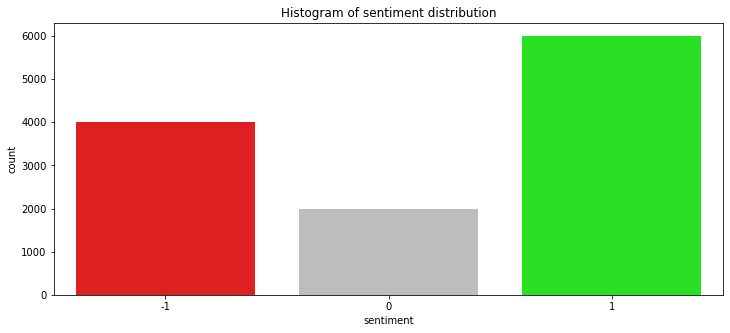

In [7]:
import Graph

Graph.sentiment_distribution(clean_dataset)